In [1]:
import json
import numpy as np
import utils

In [2]:
with open("data/coefficients.json") as f:
    coefficients = json.load(f)
coeffs = np.array(coefficients["coeffs"])
r2s = np.array(coefficients["r2s"])
idcs = np.array(coefficients["idcs"])
scoeffs = sorted(coeffs,key=lambda p: p[0])
x,y = zip(*scoeffs)

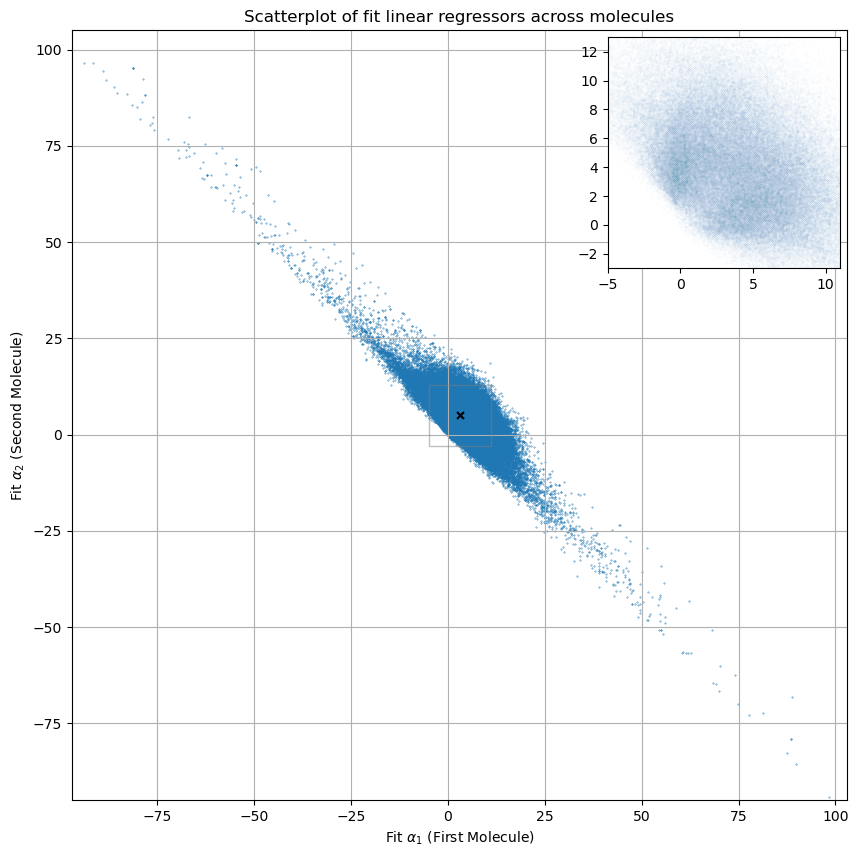

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a figure and axis
fig, ax = utils.standard_fig_ax()
ax.scatter(x,y,s=1e-1)
ax.grid()
r = 100
xm, ym = 3, 5

# The lines are helpful for debugging the figure
# ax.axhline(y=ym, color='gray', linestyle='--')
# ax.axvline(x=xm, color='gray', linestyle='--')

ax.scatter(xm, ym, color='black', s=25, marker='x')
# ax.text(xm,ym+5, 'Mean of Fit', ha='center', va='center')

ax.set_xlim((-r+xm,r+xm))
ax.set_ylim((-r+ym,r+ym))
ax.set_xlabel(r"Fit $\alpha_1$ (First Molecule)")
ax.set_ylabel(r"Fit $\alpha_2$ (Second Molecule)")

# Create an inset axis
axins = inset_axes(ax, width='30%', height='30%', loc='upper right')

# Plot the zoomed-in region on the inset axis
axins.scatter(x, y, s=1e-4)
zr = 8
axins.set_xlim(-zr+xm,zr+xm)  # Set the x-axis limits for the zoomed-in region
axins.set_ylim(-zr+ym, zr+ym)  # Set the y-axis limits for the zoomed-in region


# Mark the zoomed-in region in the main plot
ax.indicate_inset_zoom(axins, edgecolor="gray")
ax.set_title("Scatterplot of fit linear regressors across molecules")

utils.save_figures("regressors",fig)
plt.show()
